# 1. SYRIATEL PREDICTIVE ANALYSIS OF CUSTOMER CHURN

## 1. Business Understanding

#### 1.1. Introduction 

SyriaTel, a telecommunications company based in Damascus, Syria, faces a significant challenge in reducing customer churn, which can adversely impact its revenue and overall profitability. Customer churn refers to the phenomenon where customers terminate their subscriptions, often switching to competitors or discontinuing the service altogether. Poor service quality and customer support are primary drivers of customer churn. Furthermore, the ease with which customers can switch providers and experiencing subpar customer service, such as needing multiple contacts to resolve issues, also substantially contribute to high churn rates. These factors highlight the importance of prioritizing service quality and improving customer satisfaction to effectively reduce churn.

#### 1.2. Business stakeholders

The primary stakeholder in this project is SyriaTel, a telecommunications company based in Damascus, Syria. Their main objective is to understand the patterns and reasons behind customer churn. By gaining a comprehensive understanding of why customers leave, SyriaTel can implement proactive measures to retain them. This includes improving service quality, enhancing customer support, and offering tailored solutions to address customer needs. Utilizing data-driven insights enables SyriaTel to make informed decisions, customize services, and allocate resources effectively to reduce churn. This proactive approach not only boosts customer satisfaction but also results in financial savings by minimizing the revenue loss associated with customers discontinuing their services.

#### 1.3.  Main Objective

To build a predictive classifier that assists SyrialTel Telecommunication company in determining if there is a predictable pattern to customer churning.

#### 1.4.  Experimental Design

The processes to be undertaken in this project are:

1. Data Understanding
2. Data Cleaning
3. Exploratory Data Analysis
4. Data Preparation
5. Modelling
6. Evaluation
7. Conclusion

## 2. Data Understanding

- The data utilized for this project has been sourced from [Kaggle](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). The dataset contains 3,333 entries and 21 columns, providing detailed information on various aspects of customer accounts and usage. These include the state, account length, area code, phone number, international plan, voice mail plan, number of voice mail messages, total day minutes, total day calls, total day charge, total evening minutes, total evening calls, total evening charge, total night minutes, total night calls, total night charge, total international minutes, total international calls, total international charge, customer service calls, and churn status.

#### Summary of Features in the Dataset
Each entry in the dataset represents a customer, and the attributes describe different aspects of their account and usage.


| Attribute                | Description                                                                                     |
|--------------------------|-------------------------------------------------------------------------------------------------|
| State                    | The state in which the customer resides.                                                       |
| Account Length           | The number of days the customer has had the account.                                             |
| Area Code                | The area code of the customer's phone number.                                                    |
| Phone Number             | The customer's phone number.                                                                    |
| International Plan       | A boolean indicating whether the customer has the international calling plan (True or False).   |
| Voice Mail Plan          | A boolean indicating whether the customer has the voicemail plan (True or False).               |
| Number Vmail Messages    | The number of voicemail messages the customer has sent.                                          |
| Total Day Minutes        | The total number of minutes the customer has been in calls during the day.                        |
| Total Day Calls          | The total number of calls the customer has made during the day.                                   |
| Total Day Charge         | The total amount of money charged by the telecom company for calls during the day.               |
| Total Eve Minutes        | The total number of minutes the customer has been in calls during the evening.                    |
| Total Eve Calls          | The total number of calls the customer has made during the evening.                               |
| Total Eve Charge         | The total amount of money charged by the telecom company for calls during the evening.           |
| Total Night Minutes      | The total number of minutes the customer has been in calls during the night.                      |
| Total Night Calls        | The total number of calls the customer has made during the night.                                  |
| Total Night Charge       | The total amount of money charged by the telecom company for calls during the night.             |
| Total Intl Minutes       | The total number of minutes the user has been in international calls.                             |
| Total Intl Calls         | The total number of international calls the customer has made.                                     |
| Total Intl Charge        | The total amount of money charged by the telecom company for international calls.                 |
| Customer Service Calls   | The number of calls the customer has made to customer service.                                     |
| Churn                    | A boolean indicating whether the customer terminated their contract (True or False). 

#### 2.2. Suitability of above data in predicting customer churn
The dataset contains a variety of factors crucial for understanding customer behavior and forecasting churn for SyriaTel. Essential attributes include customer subscriptions like international plans and voice mail plans, as well as call usage statistics such as total day minutes and total night minutes. The 'Churn' column, which acts as the target variable, distinguishes between customers who have terminated their service ('True') and those who haven't ('False'). This comprehensive dataset lays the groundwork for building a predictive model to accurately identify churn risks and implement focused retention strategies. This aligns with the project's goal of effectively reducing customer churn.

#### 2.3 importing the required libraries,loading and checking the data

In [1]:
# Importing the relevant libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import joblib
import warnings
import xgboost as xgb
warnings.filterwarnings('ignore')

from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, make_scorer, auc
from sklearn.metrics import roc_auc_score,ConfusionMatrixDisplay,confusion_matrix , classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier


In [4]:
# loading the datasets
dataFrame = pd.read_csv("Dataset/bigml_59c28831336c6604c800002a.csv")

In [5]:
# Creating a copy of the dataset to work with.
data = dataFrame.copy()
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# checking the shape of the data
(data.shape)

(3333, 21)

In [7]:
print(f"Data has {data.shape[0]} rows and {data.shape[1]} columns")

Data has 3333 rows and 21 columns


In [8]:
# checking for the information about the data Frame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [9]:
# checking for the unique values in the data
for i in data.columns:
    print(f"Unique values in {i} are {data[i].nunique()}")

Unique values in state are 51
Unique values in account length are 212
Unique values in area code are 3
Unique values in phone number are 3333
Unique values in international plan are 2
Unique values in voice mail plan are 2
Unique values in number vmail messages are 46
Unique values in total day minutes are 1667
Unique values in total day calls are 119
Unique values in total day charge are 1667
Unique values in total eve minutes are 1611
Unique values in total eve calls are 123
Unique values in total eve charge are 1440
Unique values in total night minutes are 1591
Unique values in total night calls are 120
Unique values in total night charge are 933
Unique values in total intl minutes are 162
Unique values in total intl calls are 21
Unique values in total intl charge are 162
Unique values in customer service calls are 10
Unique values in churn are 2


### 3. Data Prepping
#### 3.1 Data Cleaning

In [10]:
# Converting area code to object as it takes no mathematical significance.
data['area code'] = data['area code'].astype('object')

In [11]:
# Checking to confirm that the area code has been converted to object
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the above information, phone number is best used as unique identifier as it cannot be similar to more than a person.

In [12]:
#checking for duplicates in the data
print(data.duplicated().sum())

0


In [13]:
# checking for missing values in the data
print(data.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


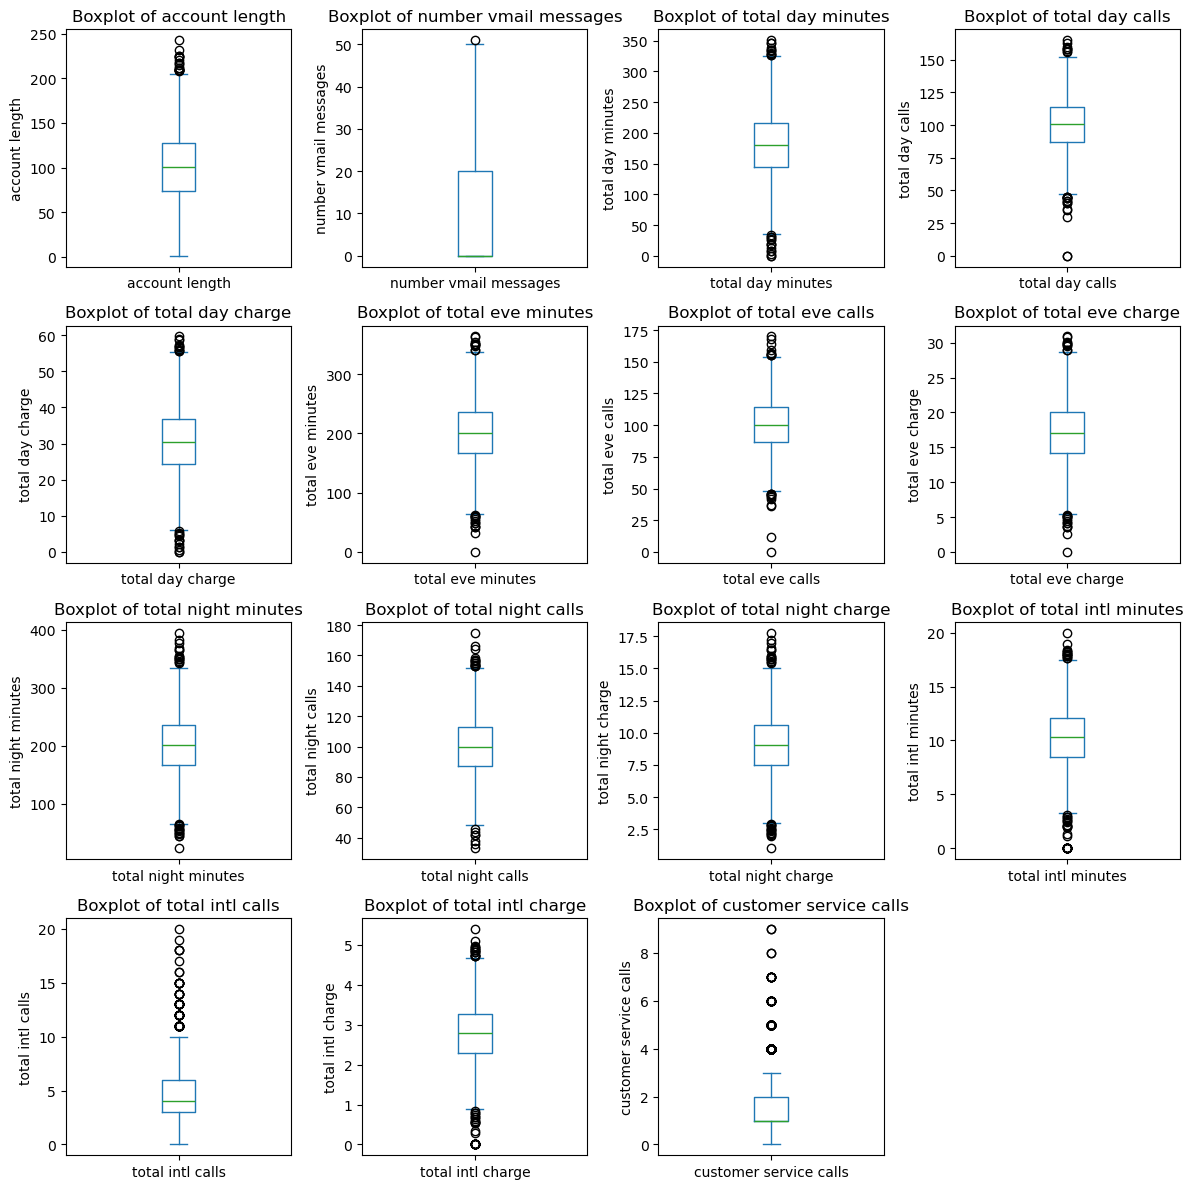

In [14]:
# checking for outliers in numerical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
num_plots = len(numeric_cols.columns)
num_rows = (num_plots + 3) // 4 # 4 columns
num_cols = min(num_plots, 4)  

plt.figure(figsize=(12, 3 * num_rows))

for i, col in enumerate(numeric_cols.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    data[col].plot(kind='box')
    plt.title(f'Boxplot of {col}')  # Set title
    plt.ylabel(col)  # Set y-label

plt.tight_layout()
plt.show()

In [15]:
# Given that the data has no missing values,the phone number column was dropped as it was only significant as a unique identifier during the cleaning process.
data.drop('phone number', axis=1, inplace=True)

From the above the data above is clean; it contains no duplicates and has no missing data. 

 ***Justification for data Cleaning***
 
 The data cleaning process has been performed to build the foundation for meaningful and accurate exploratory analysis by ensuring that the data is accurate, reliable, consistent, complete, and ready for analysis.